# ELECTRIC VEHICLE SALES IN INDIA


## import libraries

In [1]:
## Basic libraries
import numpy as np
import pandas as pd

## Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA

## Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Model Development
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import silhouette_score

## Warinings
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
sales = pd.read_excel('Ev Sales.xlsx')
sales

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
...,...,...,...,...,...,...
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048


## Basic check

In [3]:
sales.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [4]:
sales.tail()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048
73,2023-05-01,105154,44615,7736,283,157788


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [6]:
sales.dtypes

YEAR     datetime64[ns]
2 W               int64
3 W               int64
4 W               int64
BUS               int64
TOTAL             int64
dtype: object

In [7]:
sales.columns

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')

In [8]:
sales.shape

(74, 6)

In [9]:
sales.rename(columns={'2 W':'Two_Week','3 W':'Third_Week','4 W':'Fourth_Week'},inplace=True)

In [10]:
sales.columns

Index(['YEAR', 'Two_Week', 'Third_Week', 'Fourth_Week', 'BUS', 'TOTAL'], dtype='object')

In [11]:
sales.BUS.unique()

array([  0,   2,   1,  11,  29,  88,  18,  68,  69,  94,  91,  49,  54,
        21,  87,  12,  17,  97,  86,  44,  48,  40,  81, 100, 147, 157,
       186,  90,   9,  19,   7,   8,  34,  10,  39,  95, 156,  85,  70,
        80,  79,  84, 223, 331, 278, 143, 166, 167, 146, 208, 228, 204,
       243, 118, 151,  98,  99,  89, 283], dtype=int64)

In [12]:
sales.Two_Week.value_counts()

96        1
24528     1
18032     1
16046     1
14671     1
         ..
3078      1
5866      1
3126      1
2745      1
105154    1
Name: Two_Week, Length: 74, dtype: int64

In [13]:
sales.Third_Week.unique()

array([ 4748,  6720,  7178,  8775,  8905,  7414,  7250,  9598,  8719,
        8750,  6904,  7009,  6593,  7276,  7556,  9844,  9990, 11130,
       12305, 10517, 12501, 10533,  8786,  9000,  7888,  8256,  9187,
       10746, 11527, 14340, 13261, 15543, 14422, 13553, 13622, 10706,
         870,   668,  4662,  5871,  5937,  7747,  7946,  8537, 10242,
       10931, 12550, 14931,  7951,  1048,  6338,  1853, 13309, 16964,
       18497, 18690, 24118, 19548, 19621, 24606, 21626, 24100, 27846,
       30489, 33055, 37404, 35889, 40403, 35542, 34308, 35995, 45225,
       38016, 44615], dtype=int64)

In [14]:
sales.describe()

,Two_Week,Third_Week,Fourth_Week,BUS,TOTAL
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
std,25846.636971,11002.517635,1841.195763,79.696672,38251.453387
min,85.000000,668.000000,3.000000,0.000000,958.000000
25%,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,105154.000000,45225.000000,8852.000000,331.000000,157788.000000


## EXPLORATORY DATA ANALYSIS(EDA)

### Univarient 

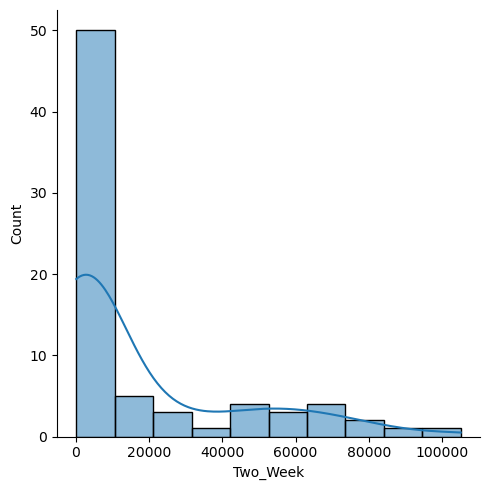

In [15]:
sns.displot(x='Two_Week',data=sales,kde=True)

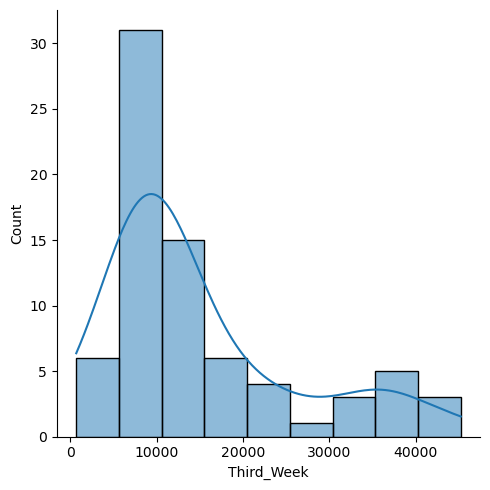

In [16]:
sns.displot(x='Third_Week',data=sales,kde=True)

## Bivarient

<Axes: xlabel='Two_Week', ylabel='Third_Week'>

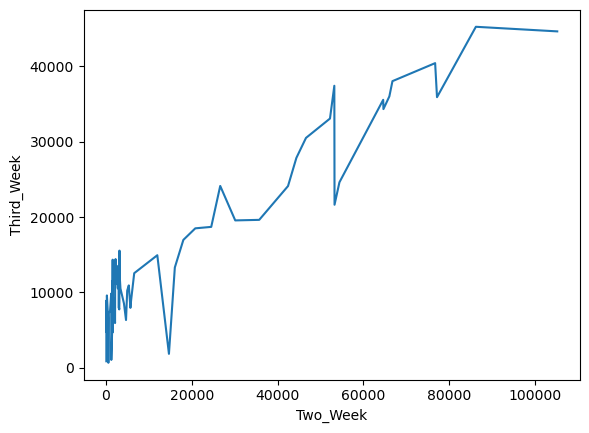

In [17]:
sns.lineplot(x='Two_Week',y='Third_Week',data=sales)

In [18]:
columns_drop = sales.drop('YEAR',axis=1)

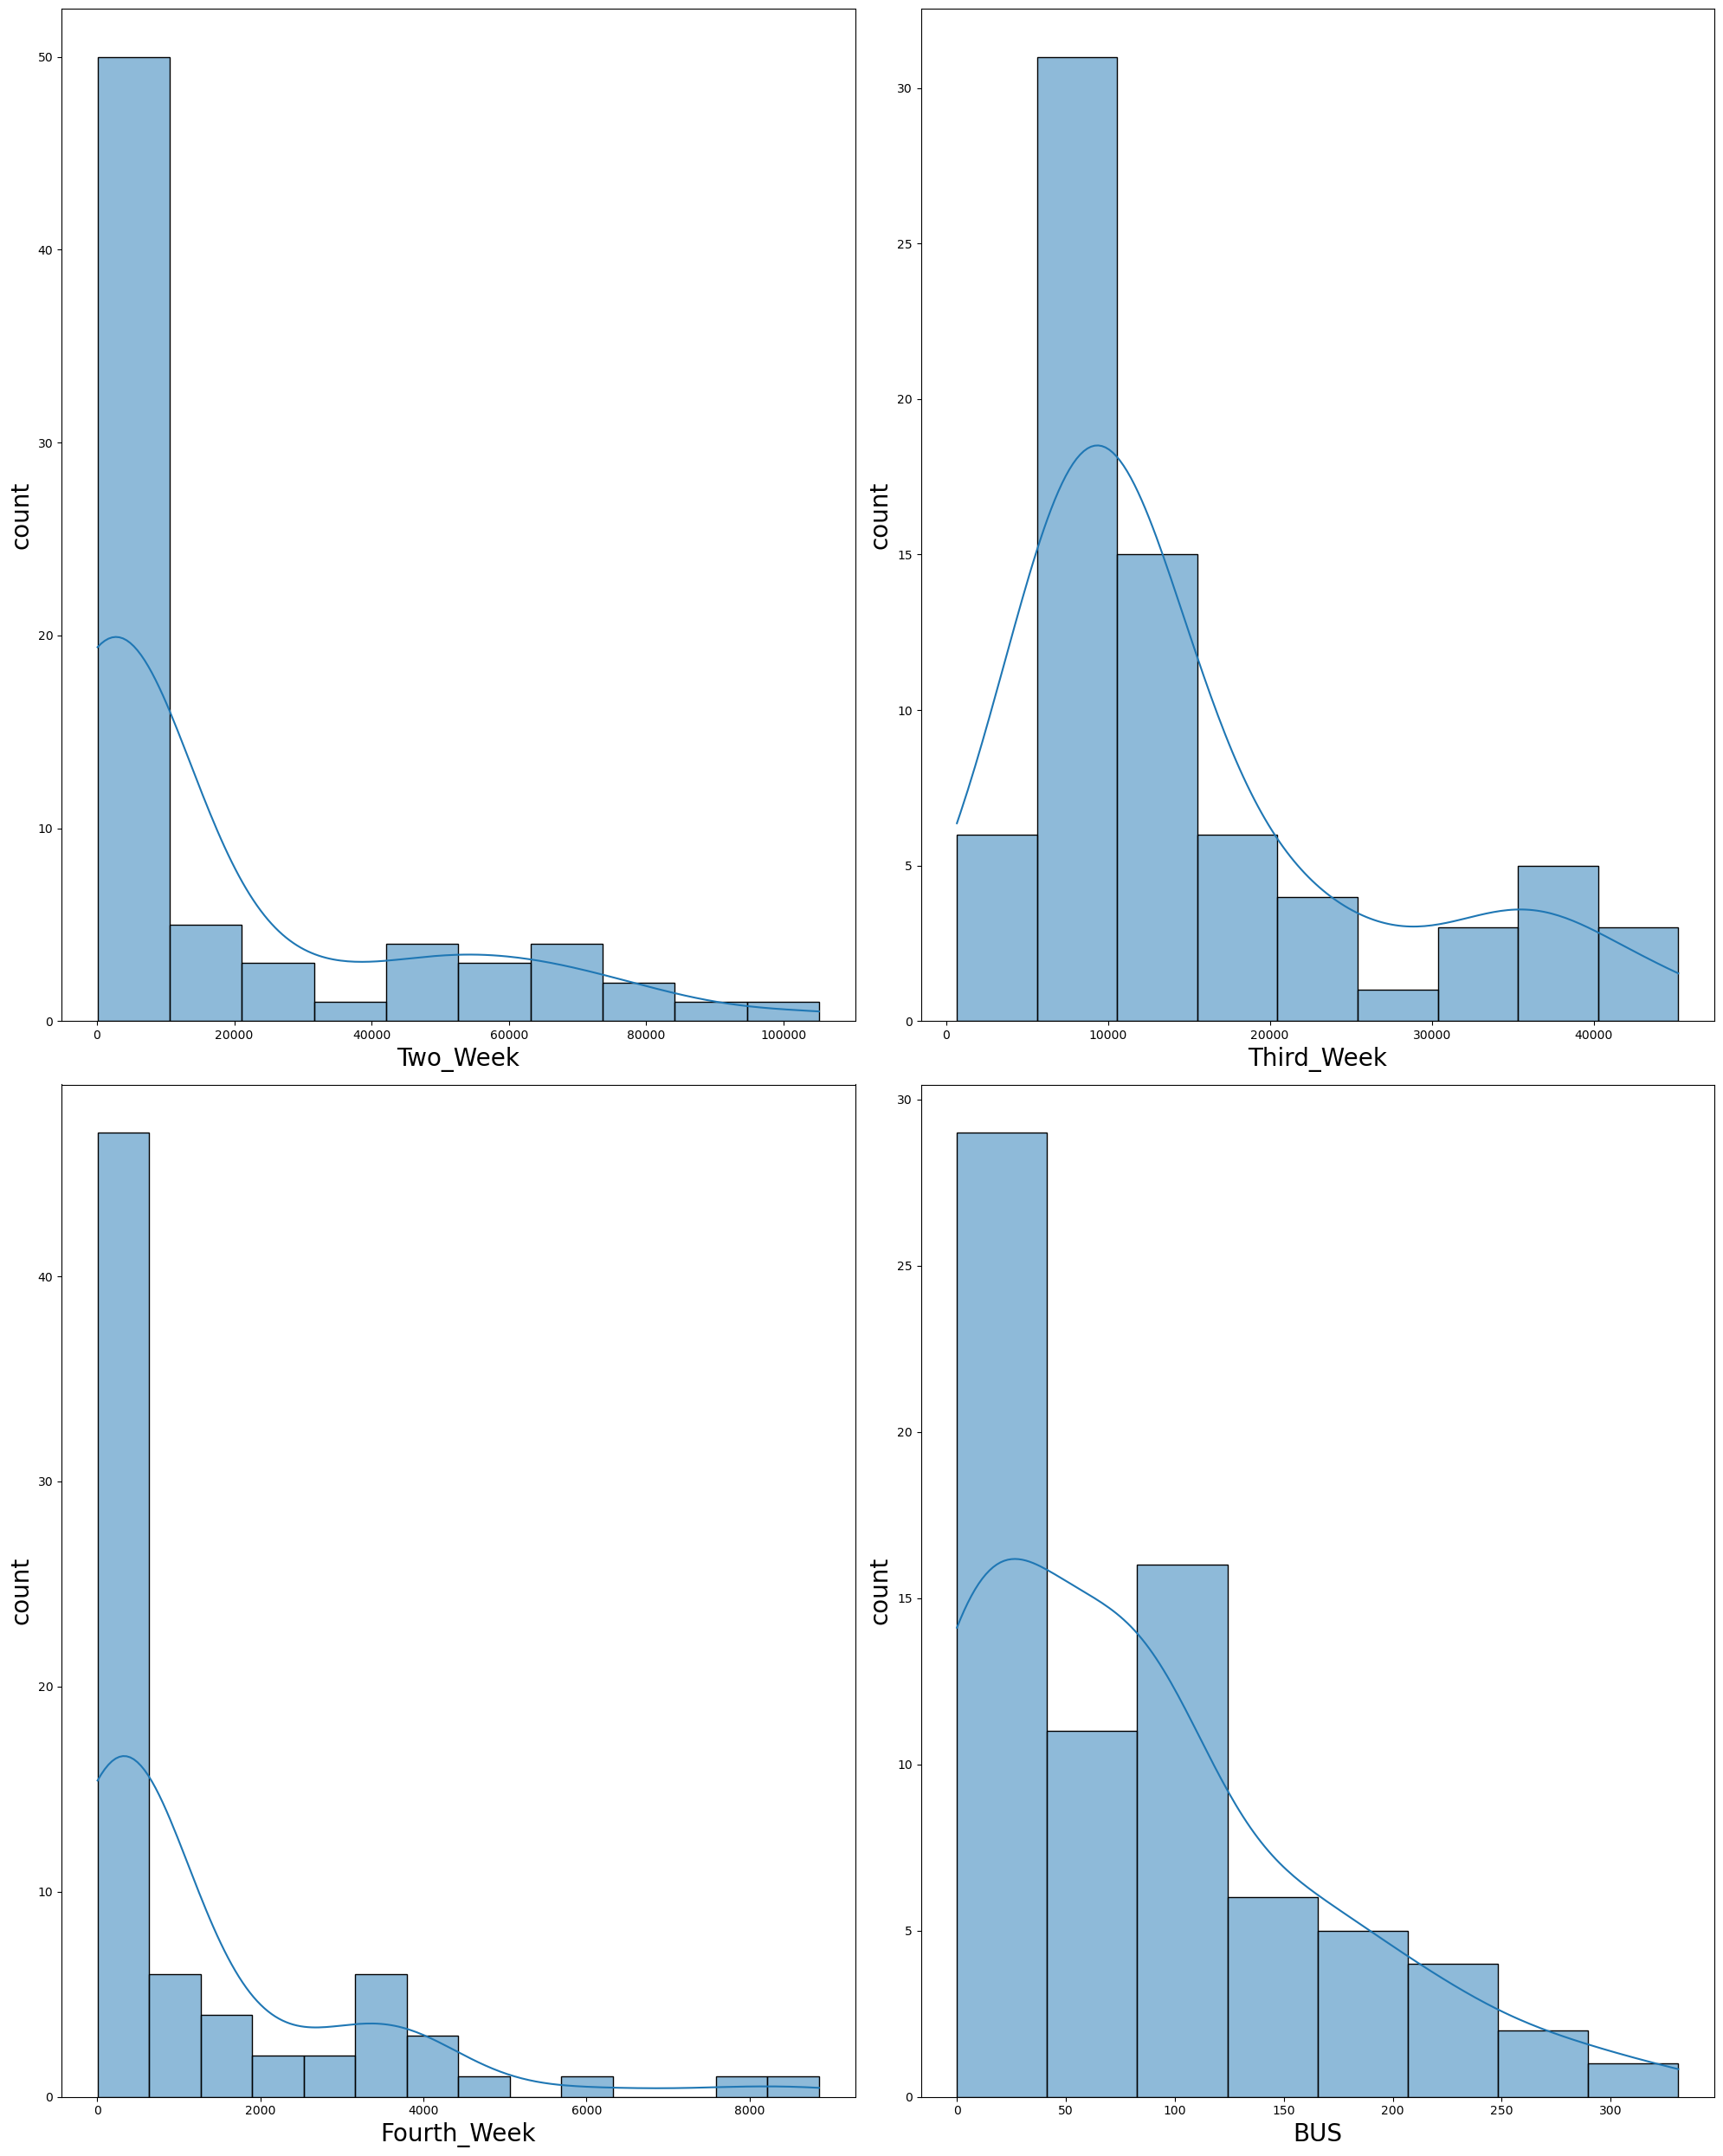

In [19]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in columns_drop:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot(columns_drop[i],kde=True)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()    

## Multivarient

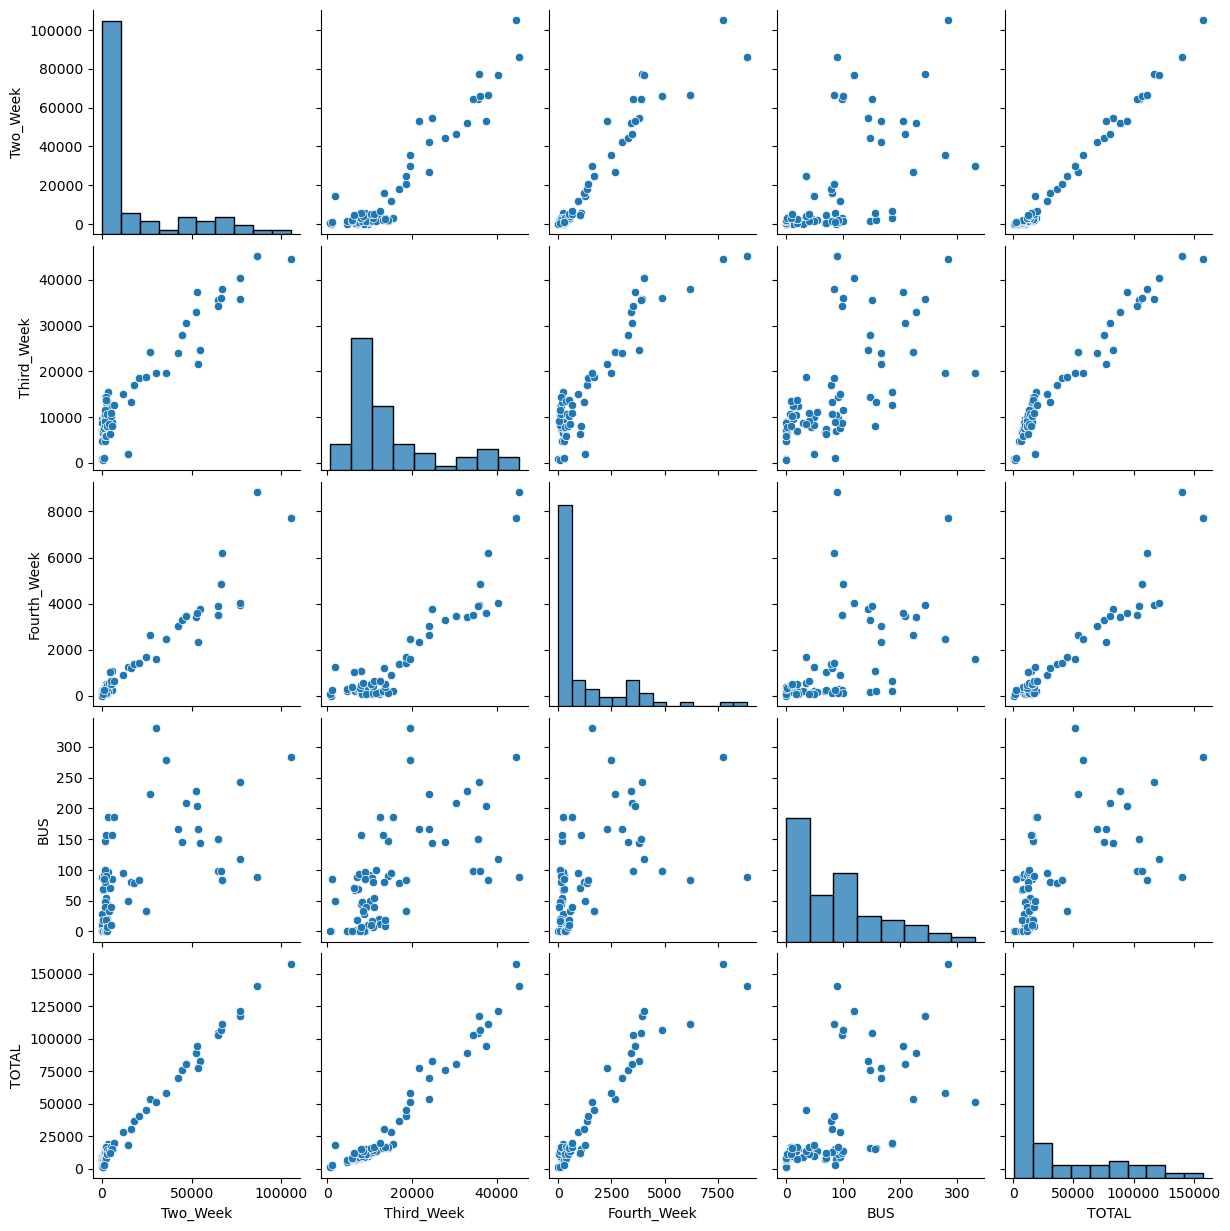

In [20]:
sns.pairplot(sales)

## Data Preprocessing

In [21]:
sales.isnull().sum()

YEAR           0
Two_Week       0
Third_Week     0
Fourth_Week    0
BUS            0
TOTAL          0
dtype: int64

## convert datetime to numerical

In [22]:
sales['Year']=pd.to_datetime(sales.YEAR,format='%d/%m/%Y').dt.year
sales['Year_month']=pd.to_datetime(sales.YEAR,format='%d/%m/%Y').dt.month

In [23]:
d=sales.drop('YEAR',axis=1,inplace=True)

In [24]:
sales.head()

,Two_Week,Third_Week,Fourth_Week,BUS,TOTAL,Year,Year_month
0,96,4748,198,0,5042,2017,4
1,91,6720,215,2,7028,2017,5
2,137,7178,149,1,7465,2017,6
3,116,8775,120,0,9011,2017,7
4,99,8905,137,0,9141,2017,8


## Check the outliers

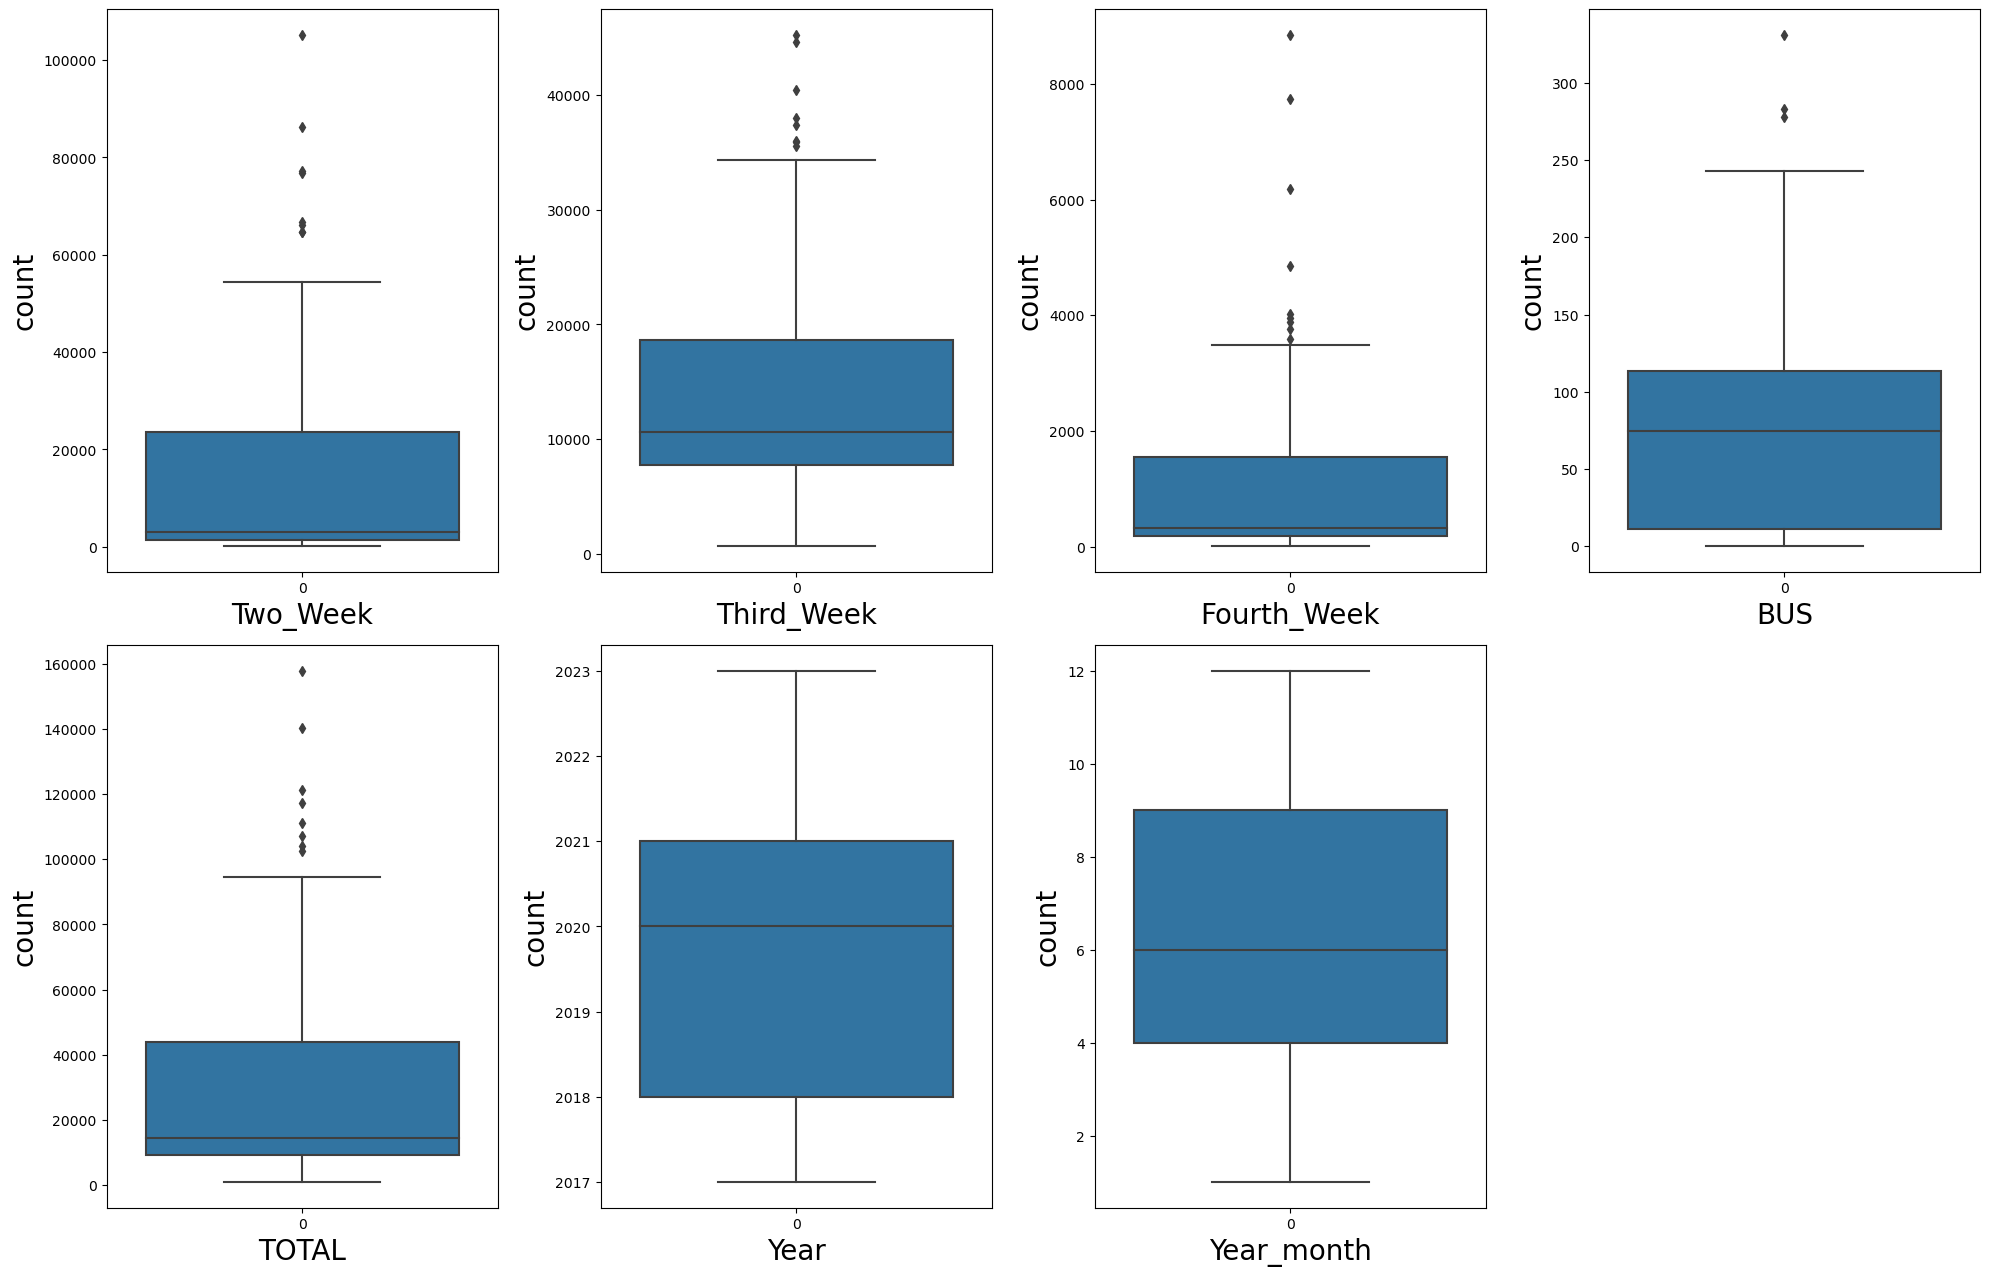

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 25))
plotnumber = 1
for i in sales:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(sales[i])
        plt.xlabel(i, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Scaling

In [26]:
sc=MinMaxScaler()
d1=['TOTAL']
data1=sc.fit_transform(sales.drop(d1,axis=1))
data1

array([[1.04693106e-04, 9.15681038e-02, 2.20363883e-02, 0.00000000e+00,
        0.00000000e+00, 2.72727273e-01],
       [5.71053308e-05, 1.35826021e-01, 2.39575093e-02, 6.04229607e-03,
        0.00000000e+00, 3.63636364e-01],
       [4.94912867e-04, 1.46104989e-01, 1.64990394e-02, 3.02114804e-03,
        0.00000000e+00, 4.54545455e-01],
       [2.95044209e-04, 1.81946720e-01, 1.32218330e-02, 0.00000000e+00,
        0.00000000e+00, 5.45454545e-01],
       [1.33245772e-04, 1.84864331e-01, 1.51429540e-02, 0.00000000e+00,
        0.00000000e+00, 6.36363636e-01],
       [2.28421323e-04, 1.51401576e-01, 2.14713527e-02, 0.00000000e+00,
        0.00000000e+00, 7.27272727e-01],
       [7.13816635e-04, 1.47720897e-01, 2.38445022e-02, 0.00000000e+00,
        0.00000000e+00, 8.18181818e-01],
       [1.22776461e-03, 2.00417443e-01, 2.06803029e-02, 3.32326284e-02,
        0.00000000e+00, 9.09090909e-01],
       [9.89825734e-04, 1.80689903e-01, 1.98892530e-02, 0.00000000e+00,
        0.00000000e+00, 

In [27]:
con_data=sales['TOTAL']
sales.columns

Index(['Two_Week', 'Third_Week', 'Fourth_Week', 'BUS', 'TOTAL', 'Year',
       'Year_month'],
      dtype='object')

In [28]:
sales2=pd.DataFrame(data1,columns=['Two_Week','Third_Week','Fourth_Week','BUS','Year_day','Year_month'])
sales2

,Two_Week,Third_Week,Fourth_Week,BUS,Year_day,Year_month
0,0.000105,0.091568,0.022036,0.000000,0.0,0.272727
1,0.000057,0.135826,0.023958,0.006042,0.0,0.363636
2,0.000495,0.146105,0.016499,0.003021,0.0,0.454545
3,0.000295,0.181947,0.013222,0.000000,0.0,0.545455
4,0.000133,0.184864,0.015143,0.000000,0.0,0.636364
...,...,...,...,...,...,...
69,0.614491,0.754988,0.394056,0.296073,1.0,0.000000
70,0.627664,0.792850,0.547746,0.299094,1.0,0.090909
71,0.819547,1.000000,1.000000,0.268882,1.0,0.181818
72,0.634535,0.838207,0.699514,0.253776,1.0,0.272727


In [29]:
final_df=pd.concat([sales2,con_data],axis=1)

In [30]:
final_df

,Two_Week,Third_Week,Fourth_Week,BUS,Year_day,Year_month,TOTAL
0,0.000105,0.091568,0.022036,0.000000,0.0,0.272727,5042
1,0.000057,0.135826,0.023958,0.006042,0.0,0.363636,7028
2,0.000495,0.146105,0.016499,0.003021,0.0,0.454545,7465
3,0.000295,0.181947,0.013222,0.000000,0.0,0.545455,9011
4,0.000133,0.184864,0.015143,0.000000,0.0,0.636364,9141
...,...,...,...,...,...,...,...
69,0.614491,0.754988,0.394056,0.296073,1.0,0.000000,102545
70,0.627664,0.792850,0.547746,0.299094,1.0,0.090909,106977
71,0.819547,1.000000,1.000000,0.268882,1.0,0.181818,140360
72,0.634535,0.838207,0.699514,0.253776,1.0,0.272727,111048


## Feature Engineering

In [31]:
final_df.corr()

,Two_Week,Third_Week,Fourth_Week,BUS,Year_day,Year_month,TOTAL
Two_Week,1.000000,0.946865,0.957640,0.615954,0.788166,-0.061349,0.995435
Third_Week,0.946865,1.000000,0.918034,0.627012,0.720406,0.028082,0.972932
Fourth_Week,0.957640,0.918034,1.000000,0.545935,0.768004,-0.099662,0.960412
BUS,0.615954,0.627012,0.545935,1.000000,0.601425,-0.064229,0.624915
Year_day,0.788166,0.720406,0.768004,0.601425,1.000000,-0.203671,0.778002
Year_month,-0.061349,0.028082,-0.099662,-0.064229,-0.203671,1.000000,-0.038307
TOTAL,0.995435,0.972932,0.960412,0.624915,0.778002,-0.038307,1.000000


<Axes: >

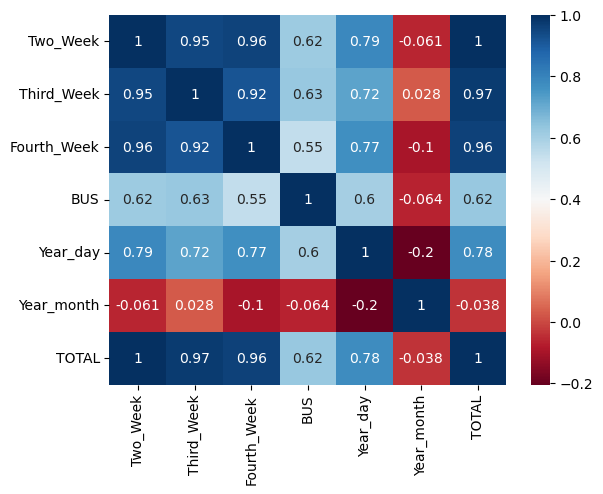

In [32]:
sns.heatmap(final_df.corr(),cmap='RdBu',annot=True)

## Model creation

In [33]:
x=final_df.drop('TOTAL',axis=1)
y=final_df.TOTAL

## Training and Testing data

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)    

In [35]:
x_train.shape

(51, 6)

In [36]:
x_test.shape

(23, 6)

In [37]:
y_train.shape

(51,)

In [38]:
y_test.shape

(23,)

## Use to Linear Regression model

In [39]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_predict = linear_model.predict(x_test)
y_predict

array([  9141.,  80757.,  14973.,   5042.,  13241., 157788.,   7406.,
        16490.,   7361.,  44933.,  94407.,  19095.,   9165.,  16946.,
         7716.,  12239.,  51587.,  12120.,  16892.,   7718., 106977.,
        11810.,  14024.])

In [41]:
linear_model.coef_

array([ 1.05069000e+05,  4.45570000e+04,  8.84900000e+03,  3.31000000e+02,
       -5.19897672e-11,  2.82746275e-11])

In [42]:
linear_model.intercept_

756.0000000000364

## model evaluation

In [43]:
mse = mean_squared_error(y_test,y_predict)
mse

2.201091645629148e-21

In [44]:
mae = mean_absolute_error(y_test,y_predict)
mae

3.3058155247050784e-11

In [45]:
r2 = r2_score(y_test,y_predict)
r2

1.0

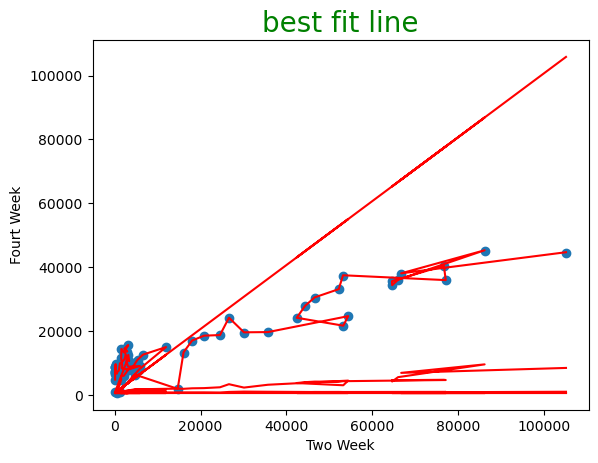

In [46]:
X = sales.Two_Week
Y = sales.Third_Week
reg_line = linear_model.coef_*x+linear_model.intercept_
plt.scatter(X,Y)
plt.title("best fit line",{'size':20,'color':'green'})
plt.xlabel('Two Week')
plt.ylabel('Fourt Week')
plt.plot(X,reg_line,color='r')
plt.show()

## <font color = green > By using LINEAR REGRESSION model we got r2_score of 1.0%

## Use to KNN Regression

In [47]:
rmse_error=[]
for k in range(1,21):
    k_model = KNeighborsRegressor(n_neighbors=k)
    k_model.fit(x_train,y_train)
    pred = k_model.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test,pred))
    rmse_error.append(error)
    print('RMSE value for k=',k,'is:',error)

RMSE value for k= 1 is: 5791.089654918524
RMSE value for k= 2 is: 7396.505806210413
RMSE value for k= 3 is: 8284.122246862738
RMSE value for k= 4 is: 10593.27524766661
RMSE value for k= 5 is: 10222.687060268154
RMSE value for k= 6 is: 11271.427778103573
RMSE value for k= 7 is: 11947.767696218565
RMSE value for k= 8 is: 12720.887032729146
RMSE value for k= 9 is: 13077.072893222054
RMSE value for k= 10 is: 13678.052535897888
RMSE value for k= 11 is: 14102.440175199372
RMSE value for k= 12 is: 15027.620803814847
RMSE value for k= 13 is: 15622.119238055926
RMSE value for k= 14 is: 16544.437228495593
RMSE value for k= 15 is: 17304.523452682664
RMSE value for k= 16 is: 18092.102840852254
RMSE value for k= 17 is: 19187.652984020842
RMSE value for k= 18 is: 20059.048620152087
RMSE value for k= 19 is: 21086.471361362568
RMSE value for k= 20 is: 21689.594644051347


In [48]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [49]:
y_pred = KNN.predict(x_test)
y_pred

array([  9544.4,  85762. ,  12250.4,   7892.6,  13906.6, 115754.2,
        11133.6,  13712.6,   9204. ,  27388.4, 101435.4,  15326. ,
        11133.6,  13712.6,   9544.4,  11482.6,  61599.4,  14491.4,
        13712.6,   7684.4, 102503.6,  11092.2,   7363.2])

In [50]:
mse = mean_squared_error(y_test,y_pred)
mse

104503330.73217393

In [51]:
mae = mean_absolute_error(y_test,y_pred)
mae

5461.156521739131

In [52]:
r2 = r2_score(y_test,y_pred)
r2

0.9321963478081756

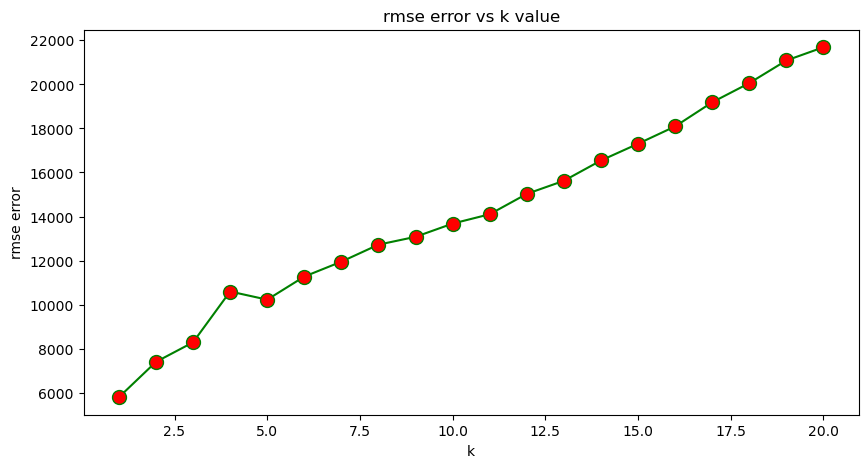

In [53]:
plt.figure(figsize=(10,5))
plt.plot(range(1,21),rmse_error,color='g',linestyle='solid',marker='o',markerfacecolor='r',markersize=10)
plt.title('rmse error vs k value')
plt.xlabel('k')
plt.ylabel('rmse error')
plt.show()

## <font color= green> By using KNN model we got r2_score of 0.88%

## SVM Regressor

In [54]:
svm = SVR()
svm.fit(x_train,y_train)

SVR()

In [55]:
y_pred = svm.predict(x_test)
y_pred

array([14870.30003063, 14890.88319576, 14872.56668597, 14870.53711058,
       14874.22792382, 14884.88545645, 14873.43799276, 14875.63429419,
       14871.03928115, 14882.64301654, 14890.20264477, 14880.50956497,
       14873.52779778, 14878.58305626, 14870.92039827, 14874.93448676,
       14885.98016878, 14877.3644193 , 14876.28429727, 14872.47057849,
       14888.59384897, 14870.85829346, 14874.17525137])

In [56]:
mse = mean_squared_error(y_test,y_pred)
mse

1836756986.3040757

In [57]:
mae = mean_absolute_error(y_test,y_pred)
mae

22549.088144975925

In [58]:
r2 = r2_score(y_test,y_pred)
r2

-0.19172117278672296

In [59]:
scores = cross_val_score(svm,x,y,cv=3,scoring='r2',verbose=1,n_jobs=1)
print(scores)
print("cross validation mean:",scores.mean())
print("cross validation standard:",scores.std())

[-9.19137001 -0.155037   -3.21271641]
cross validation mean: -4.186374474931028
cross validation standard: 3.7527621903336206


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


## <font color = green> By using SVM model we got r2_score of -0.19%

## Decision Tree Regression

In [60]:
smote = SMOTE()

In [61]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [62]:
print("actual counter:",Counter(y_train))
print("after smote :",Counter(y_smote))

actual counter: Counter({15726: 1, 69691: 1, 10009: 1, 53608: 1, 11367: 1, 15749: 1, 27896: 1, 2638: 1, 14171: 1, 82921: 1, 10033: 1, 8423: 1, 8288: 1, 36436: 1, 9011: 1, 13613: 1, 6468: 1, 9087: 1, 58081: 1, 7624: 1, 958: 1, 121248: 1, 40812: 1, 19944: 1, 111048: 1, 11430: 1, 12513: 1, 11177: 1, 11044: 1, 14881: 1, 11134: 1, 75644: 1, 117219: 1, 7671: 1, 16869: 1, 102545: 1, 88896: 1, 1310: 1, 16228: 1, 13331: 1, 104170: 1, 7028: 1, 30637: 1, 13381: 1, 7465: 1, 15194: 1, 15835: 1, 77360: 1, 140360: 1, 8894: 1, 17833: 1})
after smote : Counter({15726: 1, 69691: 1, 10009: 1, 53608: 1, 11367: 1, 15749: 1, 27896: 1, 2638: 1, 14171: 1, 82921: 1, 10033: 1, 8423: 1, 8288: 1, 36436: 1, 9011: 1, 13613: 1, 6468: 1, 9087: 1, 58081: 1, 7624: 1, 958: 1, 121248: 1, 40812: 1, 19944: 1, 111048: 1, 11430: 1, 12513: 1, 11177: 1, 11044: 1, 14881: 1, 11134: 1, 75644: 1, 117219: 1, 7671: 1, 16869: 1, 102545: 1, 88896: 1, 1310: 1, 16228: 1, 13331: 1, 104170: 1, 7028: 1, 30637: 1, 13381: 1, 7465: 1, 15194: 

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=42)

In [64]:
DT = DecisionTreeRegressor()

In [65]:
DT.fit(x_smote,y_smote)

DecisionTreeRegressor()

In [66]:
y_pred = DT.predict(x_test)
y_pred

array([ 13381., 104170.,  15835.,   8288., 111048.,  75644.,   9087.,
       117219.,  53608.,  11134.,  36436.])

In [67]:
mse = mean_squared_error(y_test,y_pred)
mse

0.0

In [68]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.0

In [69]:
r2 = r2_score(y_test,y_pred)
r2

1.0

## <font color= green>By using DECISION TREE model we got r2_score of 1.0%

## Random Forest Regression

In [73]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
y_pred = rf.predict(x_test)

In [75]:
mse = mean_squared_error(y_test,y_pred)
mse

29768630.606709078

In [76]:
mae = mean_absolute_error(y_test,y_pred)
mae

3183.7727272727266

In [77]:
r2 = r2_score(y_test,y_pred)
r2

0.9831760978368864

## <font color=green> By using DECISION TREE model we got r2_score of 0.99%

##  Evaluation model plot

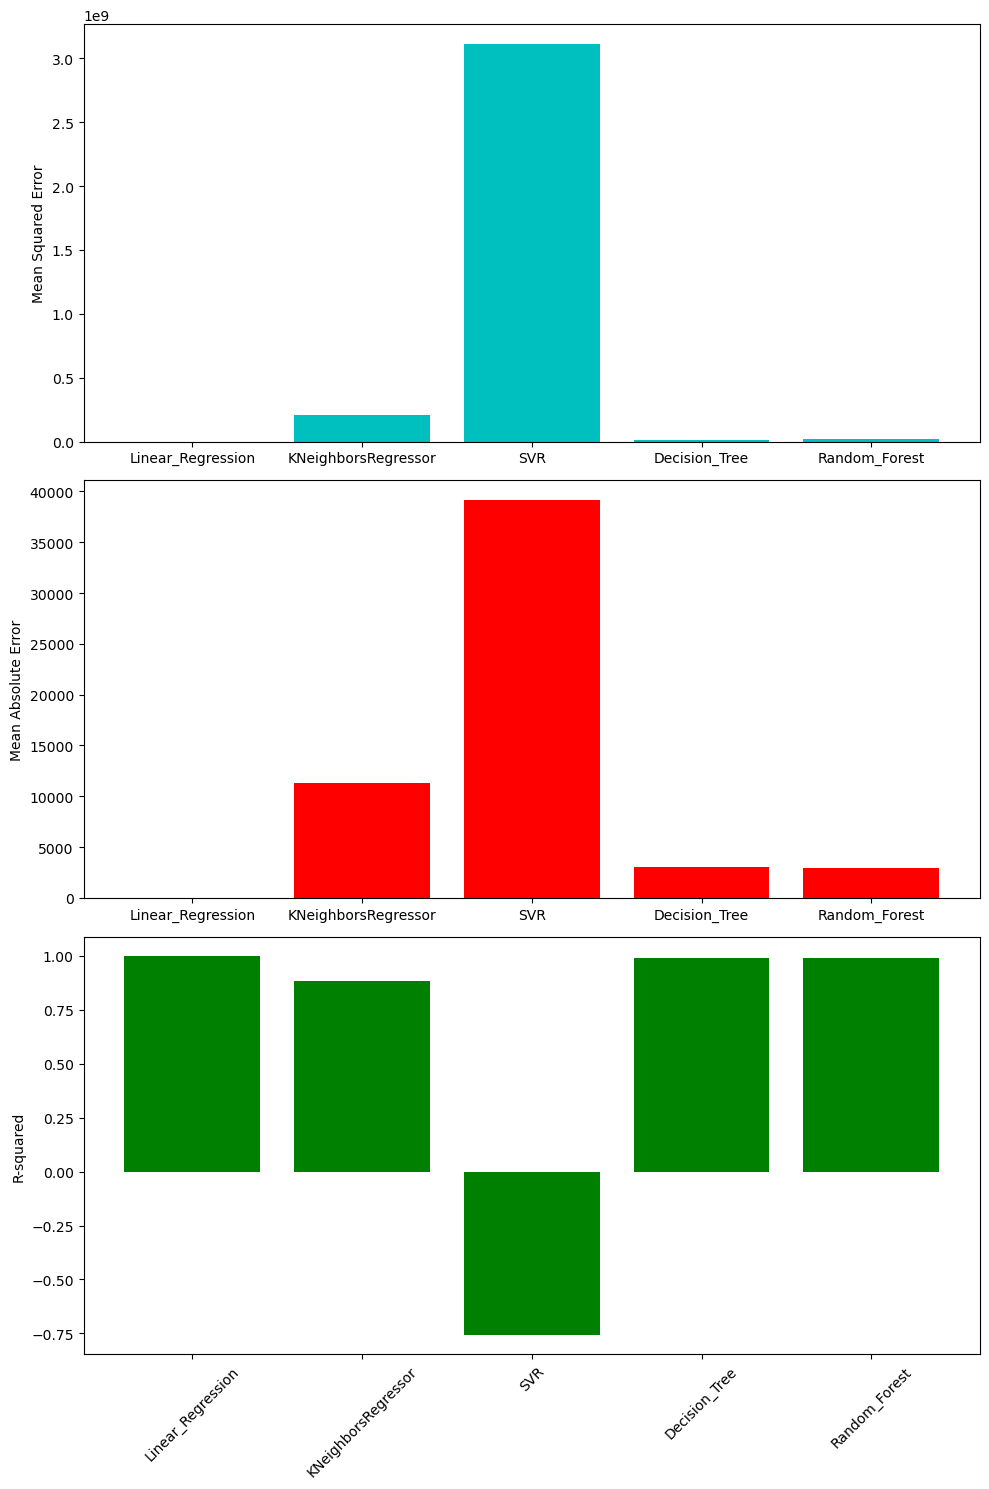

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear_Regression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision_Tree': DecisionTreeRegressor(),
    'Random_Forest': RandomForestRegressor()
}

mean_squared_errors = {}
mean_absolute_errors = {}
r2_scores = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2score = r2_score(y_test, y_predict)
    mean_squared_errors[name] = mse
    mean_absolute_errors[name] = mae
    r2_scores[name] = r2score

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.bar(mean_squared_errors.keys(), mean_squared_errors.values(), color='c')
ax1.set_ylabel('Mean Squared Error')

ax2.bar(mean_absolute_errors.keys(), mean_absolute_errors.values(), color='r')
ax2.set_ylabel('Mean Absolute Error')

ax3.bar(r2_scores.keys(), r2_scores.values(), color='g')
ax3.set_ylabel('R-squared')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <font color = tomato>Finally, I selected the tuned Support Vector Regressor model as our final model, which gave the best results in terms of r2-score.

##  Use to Clusters

In [79]:
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(x_smote))
reduced

,0,1
0,-0.259050,0.390872
1,0.581423,-0.107888
2,-0.563812,0.336075
3,0.365170,0.509401
4,-0.270155,0.201767
5,-0.182582,0.260026
6,0.126054,-0.367988
7,-0.127521,-0.276319
8,-0.376303,0.340129
9,0.676735,-0.266907


In [80]:
kmeans = KMeans(n_clusters=8,random_state=10)
kmeans=kmeans.fit(reduced)

In [81]:
kmeans

KMeans(random_state=10)

In [82]:
centriod =kmeans.cluster_centers_
centriod

array([[-0.25856156, -0.36550891],
       [ 0.16258175,  0.25596848],
       [ 1.14567498, -0.11599983],
       [-0.35405848,  0.29129004],
       [ 0.80226325,  0.44427836],
       [ 0.66048601, -0.22864193],
       [-0.33916388, -0.1070752 ],
       [ 0.12300389, -0.38014729]])

In [83]:
kmeans.labels_

array([3, 5, 3, 1, 3, 3, 7, 0, 3, 5, 6, 6, 6, 1, 6, 3, 6, 3, 5, 3, 0, 4,
       1, 7, 2, 6, 6, 3, 6, 7, 0, 5, 4, 0, 3, 5, 4, 0, 3, 3, 4, 6, 1, 0,
       6, 0, 3, 5, 2, 6, 6])

## Evaluate Metrics

In [84]:
labels = kmeans.labels_
labels
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced,labels)
score

0.4229909588143359

Text(0, 0.5, 'wcss')

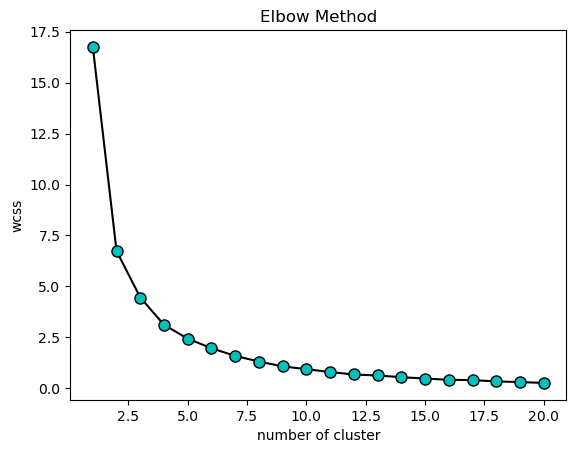

In [85]:
wcss = []
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss,color='k',linestyle='solid',marker='o',markerfacecolor='c',markersize=8) 
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')

In [86]:
wcss

[16.753823332612647,
 6.732918457435347,
 4.4527746504966785,
 3.111247720491605,
 2.432462505598563,
 1.9625621768040764,
 1.5863866400989144,
 1.3099714618136118,
 1.0704517866523737,
 0.9365005452599314,
 0.7931795658002864,
 0.6739164815852174,
 0.6245840400099358,
 0.5411059125220324,
 0.47617105443323715,
 0.4143211363338771,
 0.3980747818408669,
 0.33408463661080184,
 0.3014757679014408,
 0.260085348950002]

## Hierarchical cluster

In [87]:
 hierarchical_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [88]:
labels1 = hierarchical_cluster.fit_predict(reduced)
labels1

array([1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2,
       2, 2, 1, 0, 0, 2, 2], dtype=int64)

In [89]:
score1 = silhouette_score(reduced,labels1)
print(f'Hierarchical clustering silhouette_score:{score1}')

Hierarchical clustering silhouette_score:0.4405354871003766


In [90]:
print(f'Kmeans clustering silhouette_score is:{score}')
print(f'Hierarchical clustering silhouette_score is:{score1}')

Kmeans clustering silhouette_score is:0.4229909588143359
Hierarchical clustering silhouette_score is:0.4405354871003766


## <font color= green> Both algorithms are performing well but comparitively Hierarchical clustering perform better than KMeans clustering